In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv3D, Flatten,MaxPooling3D,AveragePooling3D, concatenate,Input ,SpatialDropout3D,Dropout
import keras
from math import e
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from sklearn.model_selection import KFold

In [4]:
inputData = xr.open_dataset('CNN_input.nc')

In [5]:
t2mTsAll=inputData.t2mTsAll
wsTsAll=inputData.wsTsAll
rhTsAll=inputData.rhTsAll
invTsAll=inputData.invTsAll
wTsAll=inputData.wTsAll
ushearTsAll=inputData.ushearTsAll
SST1DAll=inputData.SST1DAll
SST5DAll=inputData.SST5DAll
SST7DAll=inputData.SST7DAll
SST14DAll=inputData.SST14DAll
SST30DAll=inputData.SST30DAll

In [6]:
fogData = xr.open_dataset('../../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-1-1','2018-12-31'))
yAll=yAll/25.0

In [7]:
t2m_train,t2m_test,ws_train,ws_test,rh_train,rh_test,inv_train,inv_test, w_train, w_test,ushear_train, ushear_test,SST1D_train,SST1D_test,SST5D_train,SST5D_test,SST7D_train,SST7D_test,SST14D_train,SST14D_test,SST30D_train,SST30D_test,y_train,y_test= train_test_split( t2mTsAll,wsTsAll,rhTsAll,invTsAll, wTsAll,ushearTsAll,SST1DAll,SST5DAll,SST7DAll,SST14DAll,SST30DAll,yAll,test_size=0.20, random_state=0)

In [8]:
t2mtrain=t2m_train.values
t2mtrain=t2mtrain[:,:,:,None]
t2mtrain.shape


wstrain=ws_train.values
wstrain=wstrain[:,:,:,None]
wstrain.shape

rhtrain=rh_train.values
rhtrain=rhtrain[:,:,:,None]
rhtrain.shape


invtrain=inv_train.values
invtrain=invtrain[:,:,:,None]
invtrain.shape

wtrain=w_train.values
wtrain=wtrain[:,:,:,None]
wtrain.shape

usheartrain=ushear_train.values
usheartrain=usheartrain[:,:,:,None]
usheartrain.shape

SST1Dtrain=SST1D_train.values
SST1Dtrain=SST1Dtrain[:,:,:,None]
SST1Dtrain.shape

SST5Dtrain=SST5D_train.values
SST5Dtrain=SST5Dtrain[:,:,:,None]
SST5Dtrain.shape

SST7Dtrain=SST7D_train.values
SST7Dtrain=SST7Dtrain[:,:,:,None]
SST7Dtrain.shape

SST14Dtrain=SST14D_train.values
SST14Dtrain=SST14Dtrain[:,:,:,None]
SST14Dtrain.shape

SST30Dtrain=SST30D_train.values
SST30Dtrain=SST30Dtrain[:,:,:,None]
SST30Dtrain.shape

(1934, 18, 26, 1)

In [9]:
t2mtest=t2m_test.values
t2mtest=t2mtest[:,:,:,None]
t2mtest.shape


wstest=ws_test.values
wstest=wstest[:,:,:,None]
wstest.shape

rhtest=rh_test.values
rhtest=rhtest[:,:,:,None]
rhtest.shape


invtest=inv_test.values
invtest=invtest[:,:,:,None]
invtest.shape

wtest=w_test.values
wtest=wtest[:,:,:,None]
wtest.shape

usheartest=ushear_test.values
usheartest=usheartest[:,:,:,None]
usheartest.shape

SST1Dtest=SST1D_test.values
SST1Dtest=SST1Dtest[:,:,:,None]
SST1Dtest.shape

SST5Dtest=SST5D_test.values
SST5Dtest=SST5Dtest[:,:,:,None]
SST5Dtest.shape

SST7Dtest=SST7D_test.values
SST7Dtest=SST7Dtest[:,:,:,None]
SST7Dtest.shape

SST14Dtest=SST14D_test.values
SST14Dtest=SST14Dtest[:,:,:,None]
SST14Dtest.shape

SST30Dtest=SST30D_test.values
SST30Dtest=SST30Dtest[:,:,:,None]
SST30Dtest.shape

(484, 18, 26, 1)

In [10]:
ytrain=y_train.values
ytrain=ytrain[:,None]
ytrain.shape
ytest=y_test.values
ytest=ytest[:,None]
ytest.shape

(484, 1)

#AO1D

Epoch 1/20
61/61 [==============================] - 4s 22ms/step - loss: 0.1978 - mse: 0.0626
Epoch 2/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1761 - mse: 0.0484
Epoch 3/20
61/61 [==============================] - 1s 22ms/step - loss: 0.1694 - mse: 0.0438
Epoch 4/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1447 - mse: 0.0338
Epoch 5/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1288 - mse: 0.0271
Epoch 6/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1086 - mse: 0.0196
Epoch 7/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1019 - mse: 0.0170
Epoch 8/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1026 - mse: 0.0174
Epoch 9/20
61/61 [==============================] - 1s 21ms/step - loss: 0.0980 - mse: 0.0160
Epoch 10/20
61/61 [==============================] - 1s 20ms/step - loss: 0.0945 - mse: 0.0154
Epoch 11/20
61/61 [==============================] - 1s 20m

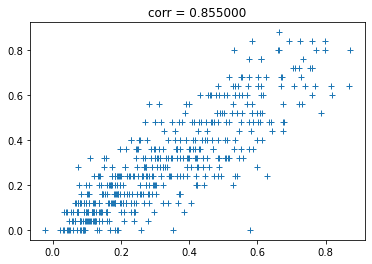

In [11]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,SST1Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,SSTtest,SSTtest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,SST1Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,SSTtrain,SSTtrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#AO5D

Epoch 1/20
61/61 [==============================] - 2s 20ms/step - loss: 0.1971 - mse: 0.0625
Epoch 2/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1721 - mse: 0.0458
Epoch 3/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1640 - mse: 0.0417
Epoch 4/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1448 - mse: 0.0355
Epoch 5/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1174 - mse: 0.0229
Epoch 6/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1142 - mse: 0.0218
Epoch 7/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1023 - mse: 0.0178
Epoch 8/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1022 - mse: 0.0175
Epoch 9/20
61/61 [==============================] - 1s 20ms/step - loss: 0.0954 - mse: 0.0150
Epoch 10/20
61/61 [==============================] - 1s 20ms/step - loss: 0.0898 - mse: 0.0136
Epoch 11/20
61/61 [==============================] - 1s 20m

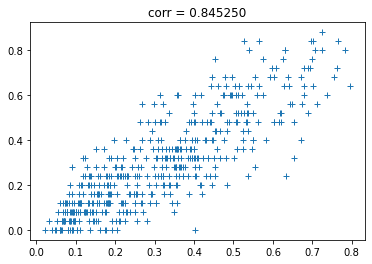

In [12]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,SST5Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,SSTtest,SSTtest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,SST5Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,SSTtrain,SSTtrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#AO7D

Epoch 1/20
61/61 [==============================] - 2s 21ms/step - loss: 0.1956 - mse: 0.0625
Epoch 2/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1715 - mse: 0.0461
Epoch 3/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1500 - mse: 0.0355
Epoch 4/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1267 - mse: 0.0263
Epoch 5/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1150 - mse: 0.0224
Epoch 6/20
61/61 [==============================] - 1s 22ms/step - loss: 0.1082 - mse: 0.0198
Epoch 7/20
61/61 [==============================] - 1s 22ms/step - loss: 0.1036 - mse: 0.0187
Epoch 8/20
61/61 [==============================] - 1s 21ms/step - loss: 0.0946 - mse: 0.0156
Epoch 9/20
61/61 [==============================] - 1s 21ms/step - loss: 0.0919 - mse: 0.0142
Epoch 10/20
61/61 [==============================] - 1s 21ms/step - loss: 0.0929 - mse: 0.0146
Epoch 11/20
61/61 [==============================] - 1s 21m

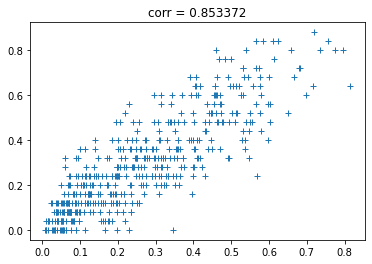

In [13]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,SST7Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,SSTtest,SSTtest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,SST7Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,SSTtrain,SSTtrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#AO14D

Epoch 1/20
61/61 [==============================] - 2s 22ms/step - loss: 0.1896 - mse: 0.0570
Epoch 2/20
61/61 [==============================] - 1s 22ms/step - loss: 0.1780 - mse: 0.0486
Epoch 3/20
61/61 [==============================] - 1s 22ms/step - loss: 0.1506 - mse: 0.0363
Epoch 4/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1273 - mse: 0.0272
Epoch 5/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1162 - mse: 0.0220
Epoch 6/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1110 - mse: 0.0217
Epoch 7/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1023 - mse: 0.0175
Epoch 8/20
61/61 [==============================] - 1s 21ms/step - loss: 0.0962 - mse: 0.0157
Epoch 9/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1011 - mse: 0.0180
Epoch 10/20
61/61 [==============================] - 1s 20ms/step - loss: 0.0894 - mse: 0.0135
Epoch 11/20
61/61 [==============================] - 1s 20m

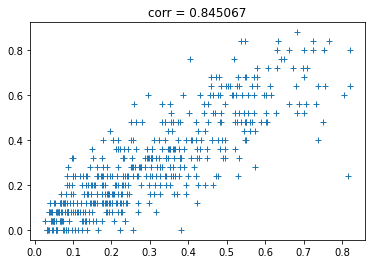

In [14]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,SST14Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,SSTtest,SSTtest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,SST14Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,SSTtrain,SSTtrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#AO30D

Epoch 1/20
61/61 [==============================] - 2s 21ms/step - loss: 0.1984 - mse: 0.0621
Epoch 2/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1740 - mse: 0.0490
Epoch 3/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1619 - mse: 0.0412
Epoch 4/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1440 - mse: 0.0334
Epoch 5/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1206 - mse: 0.0239
Epoch 6/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1105 - mse: 0.0203
Epoch 7/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1031 - mse: 0.0180
Epoch 8/20
61/61 [==============================] - 1s 18ms/step - loss: 0.1009 - mse: 0.0172
Epoch 9/20
61/61 [==============================] - 1s 20ms/step - loss: 0.0933 - mse: 0.0146
Epoch 10/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0906 - mse: 0.0140
Epoch 11/20
61/61 [==============================] - 1s 19m

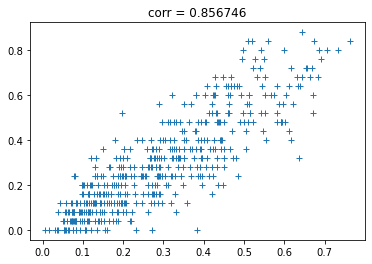

In [15]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,SST30Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,SSTtest,SSTtest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,SST30Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,SSTtrain,SSTtrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))